<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# Deber Map of Science

## GBI6-2021II: BIOINFORMÁTICA

**NOMBRE** Jessica Quiñonez

**FECHA** 17/02/2022

# T5_Mapa de Ciencia

## Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

* Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,

* Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  Ubicación Geográfica de Países - Google Developer. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

## Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:

* en el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.

* la figura tiene etiquetas adecuadas en los ejes de la visualización. 

* se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [8]:
#Se declaran las importaciones de los modulos de la clase re oara cambiar los espacios entre lineas
#y buscar el patron de interes
import re
#Se abre el documento previamente descargado de PubMed donde se realiza el mapeo de autores
#Se usa encoding="utf8" para abrir el archivo ".txt", ya que esta guardado en ese tipo de codificacion
with open("pubmed-clonalevol-set.txt", encoding="utf8") as f:
    clonalevolT = f.read()
#Se mide el archivo para saber cual es el tamaño antes de cambiar los saltos de linea por espacios con ayuda de re.sub
len(clonalevolT) 
#Se cambian los saltos de lienas por un espacio
clonalevolSinSaltos = re.sub(r'\n\s{6}', ' ', clonalevolT)

In [2]:
#Se ingresan los patrones mas comunes por la dimension del archivo, es dificil leer todos
#Pais al final de una palabra
paisesAlFinal1 = re.findall(r'\,\s(\w{2,16})\.\n', clonalevolSinSaltos)
#Pais al final de dos palabras
paisesAlFinal2 = re.findall(r'\,\s(\w{2,16}[^0-9\,]\s\w{2,16}[^0-9])\.\n', clonalevolSinSaltos)
#Pais al final de tres palabras
paisesAlFinal3 = re.findall(r'\,\s(\w{3,16}[^0-9\,]\s\w{2,3}[^0-9\,]\s\w{3,16}[^0-9\,])\.\n', clonalevolSinSaltos)
#Pais al final de una palabra y correo sin EA
paisesAlFinalSinEA1 = re.findall(r'\,\s(\w{2,16})\.\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', clonalevolSinSaltos)
#Pais al final de dos palabras y correo sin EA
paisesAlFinalSinEA2 = re.findall(r'\,\s(\w{2,16}[^0-9\,]\s\w{2,16}[^0-9])\.\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', clonalevolSinSaltos)
#Pais al final de tres palabras y correo sin EA
paisesAlFinalSinEA3 = re.findall(r'\,\s(\w{3,16}[^0-9\,]\s\w{2,3}[^0-9\,]\s\w{3,16}[^0-9\,])\.\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', clonalevolSinSaltos)
#Pais al final de una palabra y correo con EA
paisesAlFinalConEA1 = re.findall(r'\,\s(\w{2,16})\. Electronic address:\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', clonalevolSinSaltos)
#Pais al final de dos palabras y correo con EA
paisesAlFinalConEA2 = re.findall(r'\,\s(\w{2,16}[^0-9\,]\s\w{2,16}[^0-9])\. Electronic address:\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', clonalevolSinSaltos)
#Pais al final de tres palabras y correo con EA
paisesAlFinalConEA3 = re.findall(r'\,\s(\w{3,16}[^0-9\,]\s\w{2,3}[^0-9\,]\s\w{3,16}[^0-9\,])\. Electronic address:\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', clonalevolSinSaltos)
#Pais al final de una palabra y numero antes
paisesAlFinalConNum1 = re.findall(r'\,\s\w{3,9}[0-9\-]\,\s(\w{2,16})\.\n', clonalevolSinSaltos)
#Pais al final de dos palabras y numero antes
paisesAlFinalConNum2 = re.findall(r'\,\s\w{3,9}[0-9\-]\,\s(\w{2,16}[^0-9\,]\s\w{2,16}[^0-9])\.\n', clonalevolSinSaltos)
#Pais al final de tres palabras y numero antes
paisesAlFinalConNum3 = re.findall(r'\,\s\w{3,9}[0-9\-]\,\s(\w{3,16}[^0-9\,]\s\w{2,3}[^0-9\,]\s\w{3,16}[^0-9\,])\.\n', clonalevolSinSaltos)
#print(paisesAlFinal1)

#Al existir errores por la cantidad de datos no se usa | para unir en un solo bucle todos los patrones
#En alternativa se une todos en una sola lista
paisesTodosPatrones=paisesAlFinal1+paisesAlFinal2+paisesAlFinal3+paisesAlFinalSinEA1+paisesAlFinalSinEA2+paisesAlFinalSinEA3+paisesAlFinalConEA1+paisesAlFinalConEA2+paisesAlFinalConEA3+paisesAlFinalConNum1+paisesAlFinalConNum2+paisesAlFinalConNum3
#print(paises)

In [3]:
#A continuacion se creara unan lista ordenada de los paises, sin repetirlos
len(paisesTodosPatrones)
#10 primeros paises
print(paisesTodosPatrones[:10])
unique_paisesTodosPatrones = list(set(paisesTodosPatrones))
unique_paisesTodosPatrones.sort()
len(unique_paisesTodosPatrones)

['USA', 'Japan', 'USA', 'Switzerland', 'Switzerland', 'USA', 'USA', 'Switzerland', 'Switzerland', 'USA']


449

In [10]:
#Se importa la liberia capaz de abrir y leer las columas y filas de la tabala de coordenadas del mundo para asiganarlas a un diccionario
import csv
#Declarar diccionario vacio
coordenadas = {}
#Abrir el archivo de coordenadas
with open('coordenadas.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        coordenadas[row['Name']] = [row['Latitude'], row['Longitude']]
#print(coordenadas)

In [11]:
#Se crea una lista por cada elemento de unico y se compara con el documento de coordenadas para asi graficarlo y contarlo
pais = []
longitud = []
latitud = []
contador = []
for z in unique_paisesTodosPatrones:
    #print(z)
    if z in coordenadas.keys():
        pais.append(z)
        latitud.append(float(coordenadas[z][0]))
        longitud.append(float(coordenadas[z][1]))
        contador.append(paisesTodosPatrones.count(z))
#print(pais)
#print(longitud)
#print(latitud)
#print(contador)

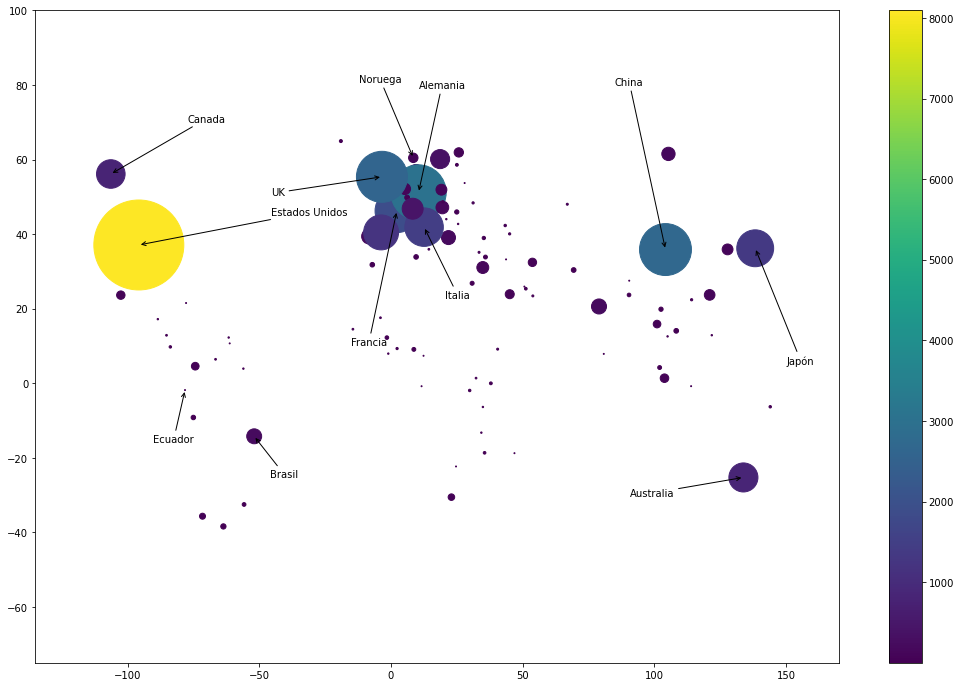

In [7]:
#Se grafican las coordenadas usando la biblioteca matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(longitud, latitud, s = contador, c= contador)
plt.colorbar()
#Limites del mapa
plt.xlim(-135,170)
plt.ylim(-75,100)
ard = dict(arrowstyle="->")
#Algunos paises
plt.annotate('Alemania', xy = (10.451526, 51.165691), 
               xytext = (10.451526, 79.165691), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (90.775136, -30.274398), arrowprops= ard)
plt.annotate('Brasil', xy = (-51.92528,-14.235004),
               xytext = (-45.92528,-25.235004), arrowprops = ard)
plt.annotate('Canada', xy = (-106.346771, 56.130366), 
               xytext = (-77.346771, 70.130366), arrowprops= ard)
plt.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (85, 80), arrowprops= ard)
plt.annotate('Ecuador', xy = (-78.183406, -1.831239), 
               xytext = (-90.183406, -15.831239), arrowprops= ard)
plt.annotate('Francia', xy = (2.213749, 46.227638), 
               xytext = (-15.213749, 10.227638), arrowprops= ard)
plt.annotate('Noruega', xy = (8.468946, 60.472024), 
               xytext = (-12.230759, 80.783471), arrowprops= ard)
plt.annotate('Italia', xy = (12.56738, 41.87194), 
               xytext = (20.56738, 22.87194), arrowprops= ard)
plt.annotate('Japón', xy = (138.252924, 36.204824), 
               xytext = (150.252924, 5.204824), arrowprops= ard)
plt.annotate('Estados Unidos', xy = (-95.712891, 37.09024), 
               xytext = (-45.712891, 45.09024), arrowprops= ard)
plt.annotate('UK', xy = (-3.435973, 55.378051), 
               xytext = (-45.435973, 50.378051), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()